In [570]:
%matplotlib inline

import os
import json
import networkx as nx

from pydot import Edge
from IPython.display import Image, SVG, display

In [571]:
# Read json description of a graph

graphs_paths = []

graphs_paths += ['../data/cgw/causal/ce_001_protest_out_graph.json']
graphs_paths += ['../data/cgw/causal/ce_005_disease_outbreak_out_graph.json']
graphs_paths += ['../data/cgw/causal/ce_040_arrest_out_graph.json']
graphs_paths += ['../data/cgw/causal/election_out_graph.json']
graphs_paths += ['../data/cgw/causal/plane_crash_out_graph.json']

graphs_paths += ['../data/cgw/causal/with-args/ce_005_disease_outbreak_out_graph.json']
graphs_paths += ['../data/cgw/causal/with-args/election_out_graph.json']

graphs_paths += ['../data/cgw/causal/non-restr/ce_001_protest_out_graph.json']
graphs_paths += ['../data/cgw/causal/non-restr/ce_005_disease_outbreak_out_graph.json']
graphs_paths += ['../data/cgw/causal/non-restr/ce_040_arrest_out_graph.json']
graphs_paths += ['../data/cgw/causal/non-restr/election_out_graph.json']
graphs_paths += ['../data/cgw/causal/non-restr/plane_crash_out_graph.json']

../data/cgw/causal/ce_001_protest_out_graph.json: 13 edges


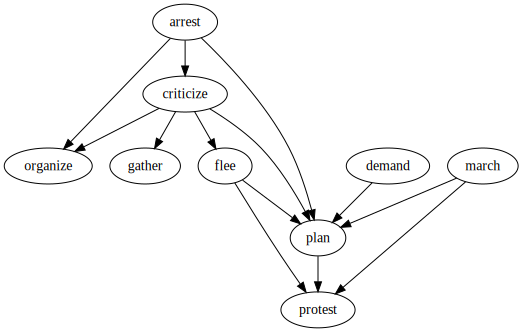

../data/cgw/causal/ce_005_disease_outbreak_out_graph.json: 14 edges


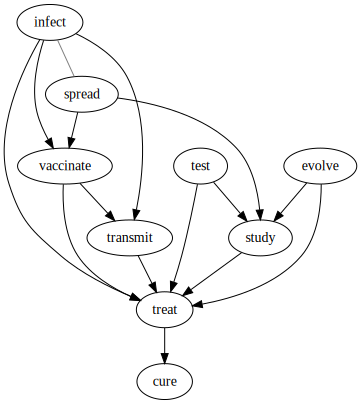

../data/cgw/causal/ce_040_arrest_out_graph.json: 21 edges


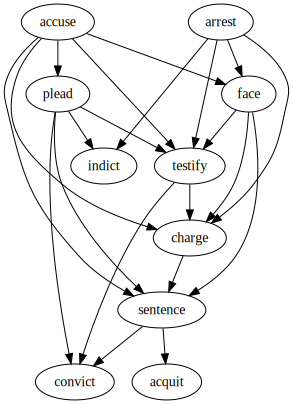

../data/cgw/causal/election_out_graph.json: 8 edges


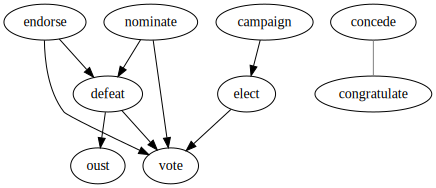

../data/cgw/causal/plane_crash_out_graph.json: 12 edges


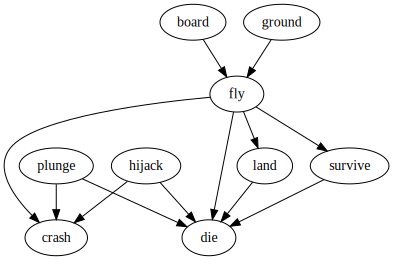

../data/cgw/causal/with-args/ce_005_disease_outbreak_out_graph.json: 22 edges


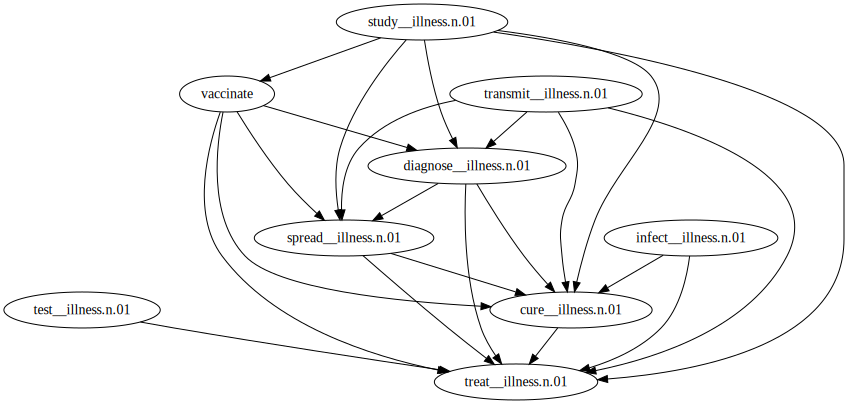

../data/cgw/causal/with-args/election_out_graph.json: 30 edges


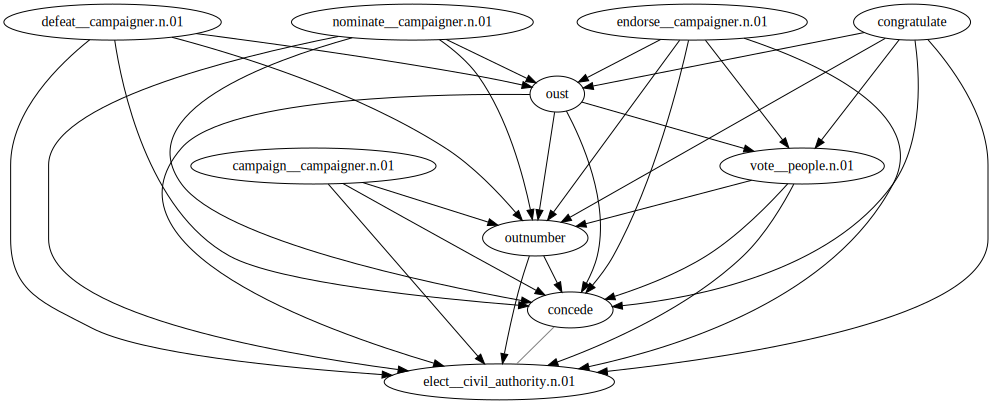

../data/cgw/causal/non-restr/ce_001_protest_out_graph.json: 12 edges


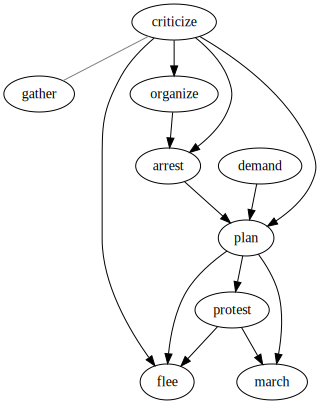

../data/cgw/causal/non-restr/ce_005_disease_outbreak_out_graph.json: 14 edges


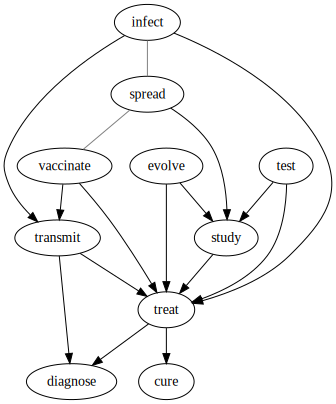

../data/cgw/causal/non-restr/ce_040_arrest_out_graph.json: 19 edges


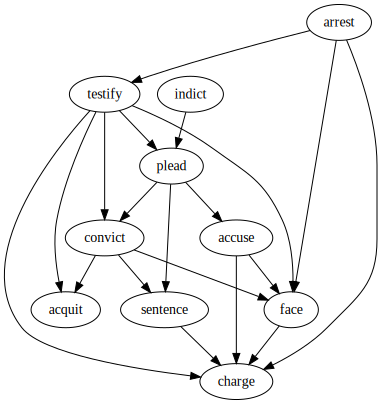

../data/cgw/causal/non-restr/election_out_graph.json: 8 edges


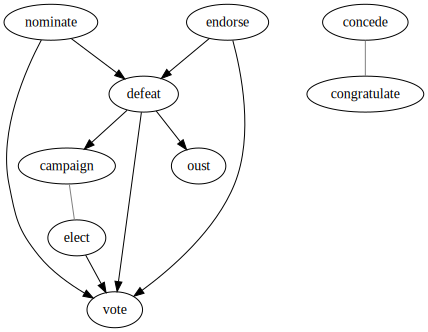

../data/cgw/causal/non-restr/plane_crash_out_graph.json: 12 edges


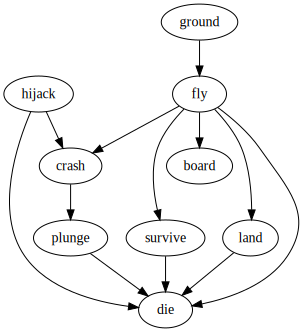

In [580]:
for graph_path in graphs_paths:
    # Read JSON graph
    with open(graph_path) as fin:
        graph = json.load(fin)
    
    # Convert to nx graph
    G = nx.DiGraph()
    Gdot = nx.drawing.nx_pydot.to_pydot(G)
    edges = []

    for edge in graph['edgesSet']:
        u, v = edge['node1']['name'], edge['node2']['name']
        edges_types = [et for et in edge['edgeTypeProbabilities'] if et['edgeType'] != 'nil']
        edge_type = max(edges_types, key=lambda et: et['probability'])['edgeType']
        arrow = '---' if edge_type == 'tt' else '-->'
        # print(u, arrow, v)
        if arrow == '-->':
            Gdot.add_edge(Edge(u, v))
            edges.append((u, v))
        else:
            Gdot.add_edge(Edge(u, v, color='grey', arrowhead='both'))
    
    print(f'{graph_path}: {len(edges)} edges')

    # Export graph
    assert graph_path.endswith('_graph.json')
    edges_path = f'{graph_path[:-len("_graph.json")]}_edges.json'
    
    # Show and export SVG graph
    svg = Gdot.create_svg()
    svg_path = f'{graph_path[:-len("_graph.json")]}.svg'
    display(SVG(svg))
    with open(svg_path, 'wb') as fout:
        fout.write(svg)

    with open(edges_path, 'w') as fout:
        json.dump(edges, fout)

---